<a href="https://colab.research.google.com/github/mc-ivan/mod8-arbol-decision/blob/main/notebook/Practica3_ArbolesDecision_IvanMamani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 3: Arboles de Decision
**Maestria en Ingenieria Matematica**

***MOD8: Modelaje Mediante IA en Economia***

**Participante:** Ivan Mamani Condori

---

Una plataforma de streaming de video ofrece una prueba gratuita de 14 días. La empresa quiere construir un modelo que prediga si un usuario se suscribirá al plan premium al finalizar la prueba. El objetivo es identificar a los usuarios con baja probabilidad de suscripción para enviarles ofertas personalizadas antes de que termine el periodo de prueba.

- Interpretar el arbol

# ÁRBOL DE DECISIÓN - CLASIFICACIÓN
### Predicción de suscripción al plan premium

In [10]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
# Leer dataset desde GitHub
url = "https://raw.githubusercontent.com/mc-ivan/mod8-arbol-decision/main/dataset/suscripcion_dataset.csv"
df = pd.read_csv(url)

# Información general
print("Información del dataset:")
print(df.info())
print("\nPrimeras filas del dataset:")
display(df.head())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dias_prueba_usados     300 non-null    int64  
 1   horas_contenido_visto  300 non-null    float64
 2   dispositivo_principal  300 non-null    object 
 3   se_suscribio           300 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 9.5+ KB
None

Primeras filas del dataset:


,dias_prueba_usados,horas_contenido_visto,dispositivo_principal,se_suscribio
0,7,40.98,Móvil,0
1,4,1.98,Web,0
2,13,31.21,Móvil,1
3,11,14.36,Web,0
4,8,39.07,TV,0


In [8]:
# Estadísticas básicas
print("\nDescripción Estadística:")
display(df.describe())


Descripción Estadística:


,dias_prueba_usados,horas_contenido_visto,se_suscribio
count,300.000000,300.000000,300.000000
mean,7.713333,30.914533,0.406667
std,4.062779,17.589017,0.492032
min,1.000000,1.300000,0.000000
25%,4.000000,15.725000,0.000000
50%,8.000000,32.625000,0.000000
75%,11.000000,45.567500,1.000000
max,14.000000,59.440000,1.000000


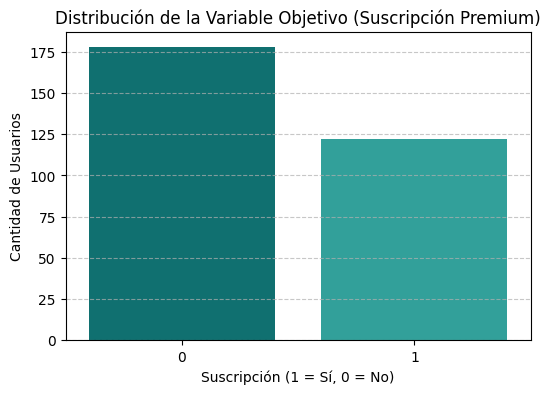

In [16]:
# Análisis exploratorio inicial
# Distribución de la variable objetivo
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x='se_suscribio',
    hue='se_suscribio',                # Asignamos hue igual al eje x
    palette=['#008080', '#20B2AA'],   # Tonos teal
    legend=False                      # Evita duplicar la leyenda
)
plt.title("Distribución de la Variable Objetivo (Suscripción Premium)")
plt.xlabel("Suscripción (1 = Sí, 0 = No)")
plt.ylabel("Cantidad de Usuarios")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

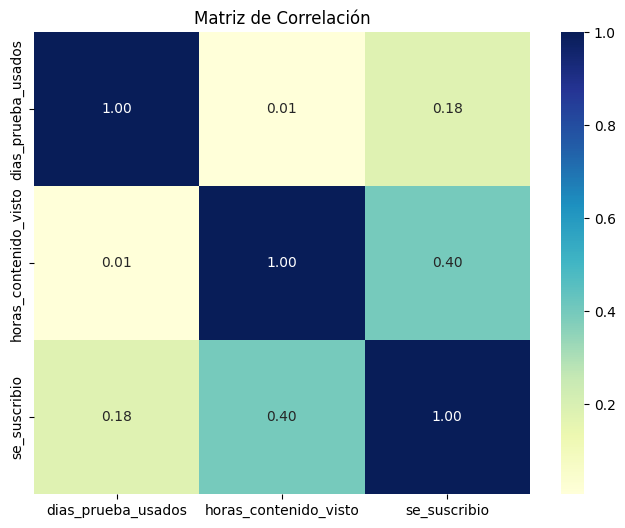

In [17]:
# Correlación entre variables numéricas
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [18]:
# Preparación de datos
# Variable objetivo
y = df['se_suscribio']

# Variables predictoras
X = df.drop(columns=['se_suscribio'])

# Codificar variable categórica 'dispositivo_principal'
X = pd.get_dummies(X, drop_first=True)

print("Variables después de codificar:")
print(X.head(), "\n")

Variables después de codificar:
   dias_prueba_usados  horas_contenido_visto  dispositivo_principal_TV  \
0                   7                  40.98                     False   
1                   4                   1.98                     False   
2                  13                  31.21                     False   
3                  11                  14.36                     False   
4                   8                  39.07                      True   

   dispositivo_principal_Web  
0                      False  
1                       True  
2                      False  
3                       True  
4                      False   



In [19]:
# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
# Entrenamiento del modelo
modelo_arbol = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [21]:
# Predicciones
y_pred = modelo_arbol.predict(X_test)

In [22]:
# Evaluación del modelo
print("\nEvaluación del modelo:")
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred)*100:.2f}%")

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Evaluación del modelo:
Precisión del modelo: 65.00%

Matriz de Confusión:
[[25  4]
 [17 14]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.60      0.86      0.70        29
           1       0.78      0.45      0.57        31

    accuracy                           0.65        60
   macro avg       0.69      0.66      0.64        60
weighted avg       0.69      0.65      0.64        60



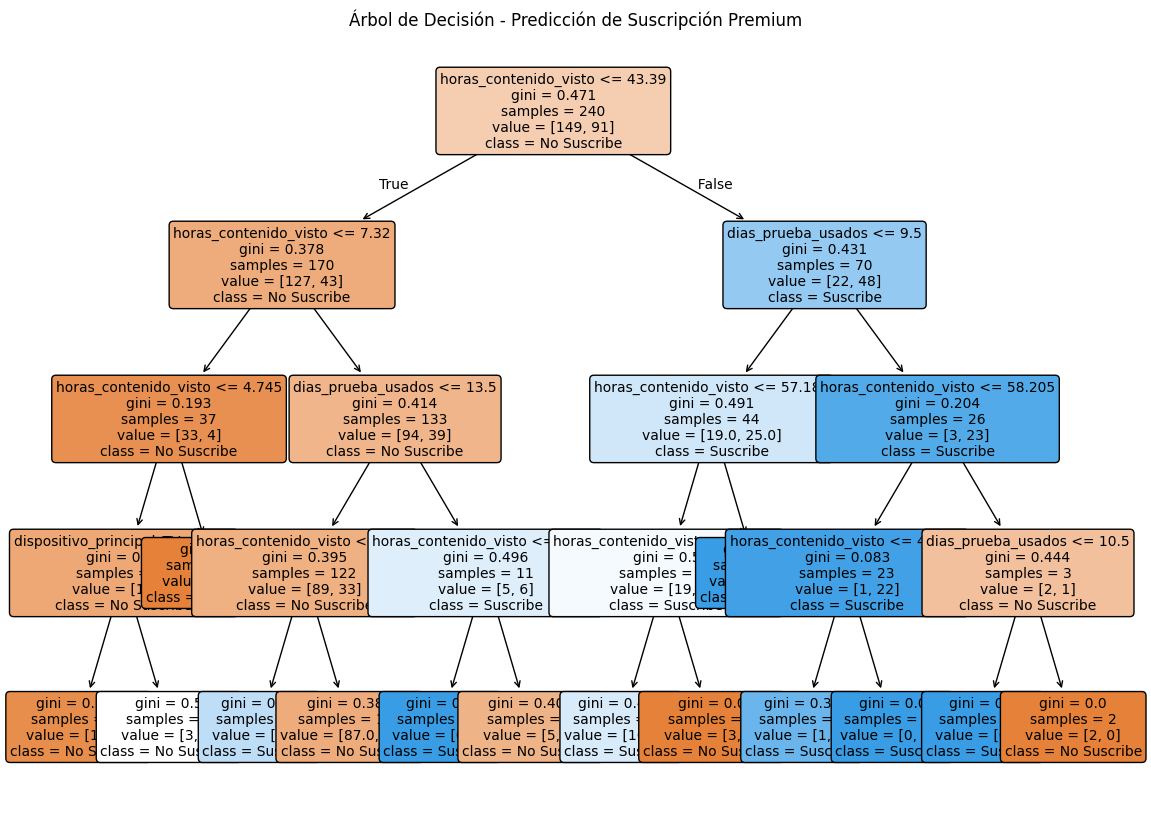

In [23]:
# Visualización del Árbol
plt.figure(figsize=(14,10))
plot_tree(
    modelo_arbol,
    filled=True,
    feature_names=X.columns,
    class_names=['No Suscribe', 'Suscribe'],
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión - Predicción de Suscripción Premium")
plt.show()

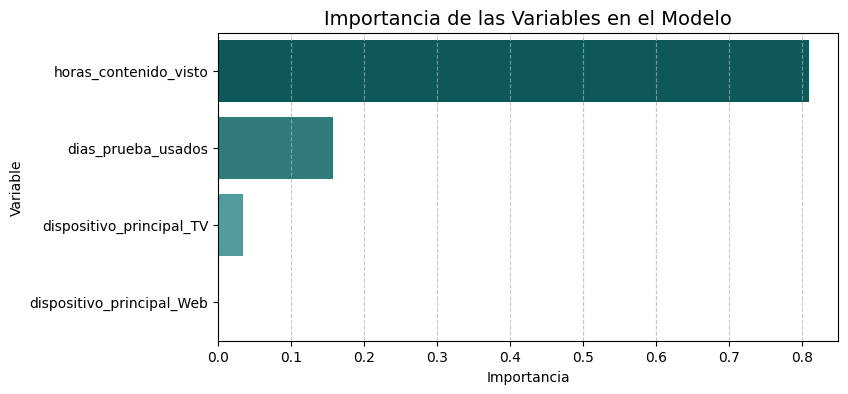

In [36]:
# Importancia de las Variables
importances = pd.Series(modelo_arbol.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(
    x=importances,
    y=importances.index,
    hue=importances.index,
    palette=sns.color_palette("blend:#006666,#66CCCC", n_colors=len(importances)),
    legend=False
)
plt.title("Importancia de las Variables en el Modelo", fontsize=14)
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Interpretación:
El modelo de clasificación tuvo una precisión del 65%, lo que indica un desempeño aceptable considerando que los datos son simples y el árbol tiene una profundidad limitada (máx. profundidad = 4).

El árbol divide principalmente a los usuarios según dos variables:
>- Horas de contenido visto
>- Días de prueba usados

La interpretación del árbol indica que:

>Los usuarios que ven más contenido (mayor número de horas) tienen más probabilidad de suscribirse.

>Aquellos con pocas horas vistas y pocos días de uso de prueba tienden a no suscribirse.

> El dispositivo principal (Móvil, Web o TV) también influye en niveles secundarios: por ejemplo, usuarios móviles tienden ligeramente a una mayor tasa de conversión.

Por otro lado, el análisis de importancia de variables confirma que “horas_contenido_visto” es la más influyente, seguida de “días_prueba_usados”, mientras que el dispositivo tiene un peso menor.

Esto sugiere que el comportamiento de uso es un mejor predictor de la decisión de suscribirse que las características demográficas o técnicas.

# ÁRBOL DE DECISIÓN - REGRESIÓN
### Estimar la probabilidad de suscripción (un valor entre 0 y 1)

In [37]:
# Librerias
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [40]:
# Cargar datos
url = "https://raw.githubusercontent.com/mc-ivan/mod8-arbol-decision/main/dataset/suscripcion_dataset.csv"
df_regresion = pd.read_csv(url)
df_regresion.head()

,dias_prueba_usados,horas_contenido_visto,dispositivo_principal,se_suscribio
0,7,40.98,Móvil,0
1,4,1.98,Web,0
2,13,31.21,Móvil,1
3,11,14.36,Web,0
4,8,39.07,TV,0


In [42]:
# Preparar X y y (tratando target como continuo)
X = df_regresion[['dias_prueba_usados', 'horas_contenido_visto']]
y = df_regresion['se_suscribio'].astype(float)  # si es 0/1, regresión dará predicciones continuas [0,1]

In [43]:
# Dividir datos (tu estilo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# Entrenar el árbol de regresión (siguiendo tu patrón max_depth etc.)
arbol_regresion = DecisionTreeRegressor(max_depth=5, random_state=42)
arbol_regresion.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [45]:
# Evaluar
predicciones = arbol_regresion.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predicciones))
print(f"Raíz Error cuadrático medio (RMSE): {rmse:.4f}")

Raíz Error cuadrático medio (RMSE): 0.5260


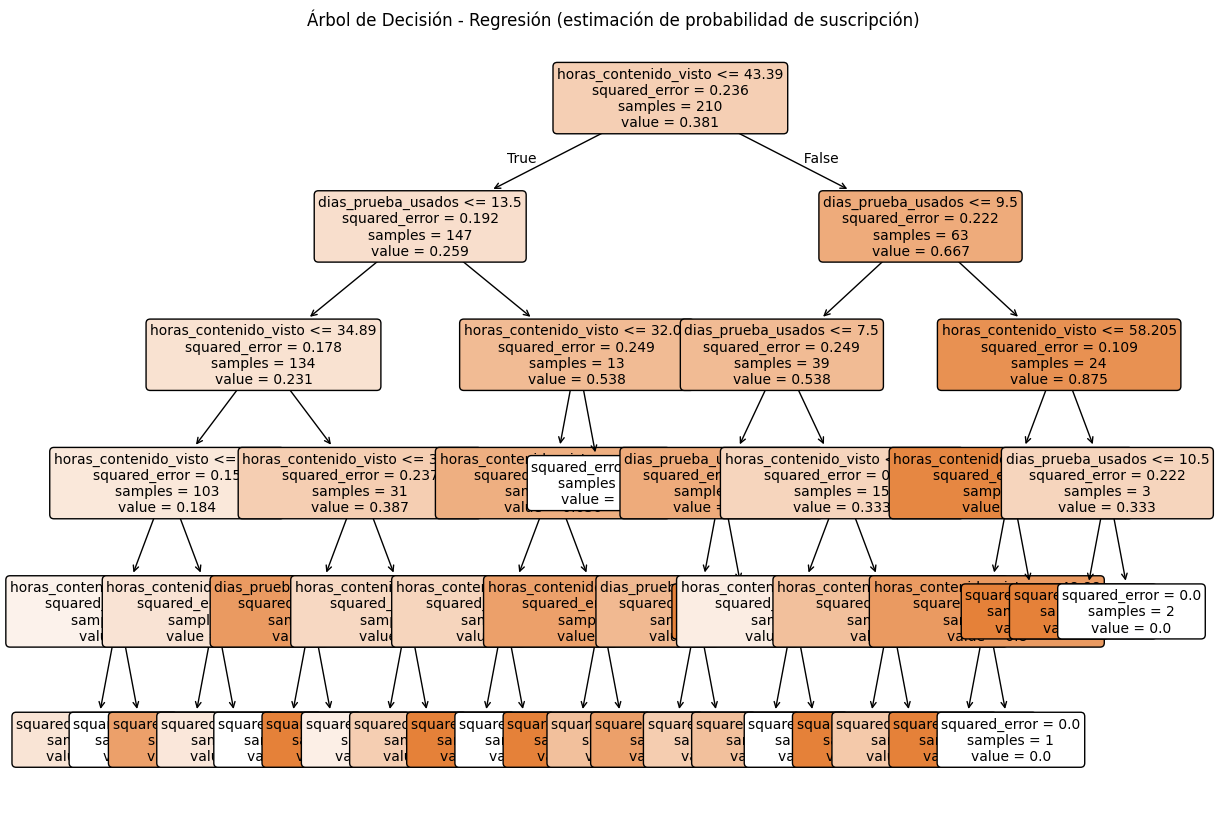

In [53]:
# Visualizar árbol
plt.figure(figsize=(14,10))
plot_tree(
    arbol_regresion,
    filled=True,
    feature_names=['dias_prueba_usados','horas_contenido_visto'],
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión - Regresión (estimación de probabilidad de suscripción)")
plt.show()

## Interpretación:
En este caso, se usó un árbol de regresión tratando el resultado **se_suscribio** como una variable continua entre 0 y 1, interpretada como probabilidad estimada de suscripción.

El modelo obtuvo un RMSE de 0.526, lo que implica un error medio moderado en las predicciones.

El árbol indica que:

> Los usuarios con más de cierto umbral de horas de contenido visto (alrededor de 35–40 horas) tienen una probabilidad mucho mayor de suscribirse.

> Cuando el número de días de prueba usados supera los 10, la probabilidad también aumenta.

> En contraste, quienes usan pocos días de prueba o consumen poco contenido tienen una probabilidad baja (valores cercanos a 0).

En resumen, el nivel de interacción durante la prueba gratuita es el principal determinante de si un usuario se convertirá en cliente pago.